# Solution of Intro LAB

In this example a simple linear regression is performed with scipy and scikit learn. The implementation of the least square algorithm is also presented.

In [6]:
#import all required packages
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn.linear_model import LinearRegression

In [2]:
# Read used car data from file
filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

print(type(lines))

data=list(lines)
for line in data[0:10]:
    print(line)

<class '_csv.reader'>
['km', 'year', 'powerPS', 'avgPrice']
['125000', '2001', '40', '1371.11']
['150000', '2001', '40', '1298.70']
['5000', '2001', '60', '1232.43']
['50000', '2001', '60', '1733.89']
['60000', '2001', '60', '1985.24']
['70000', '2001', '60', '2100.86']
['80000', '2001', '60', '1473.93']
['90000', '2001', '60', '1542.09']
['100000', '2001', '60', '1399.41']


In [3]:
with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    # get header from first row
    headers = next(reader)
    # get all the rows as a list
    data = list(reader)
    # transform data into numpy array
    data = np.array(data).astype(float)
    
print(headers)
print(data.shape)
print(data[:3])

['km', 'year', 'powerPS', 'avgPrice']
(1297, 4)
[[1.25000e+05 2.00100e+03 4.00000e+01 1.37111e+03]
 [1.50000e+05 2.00100e+03 4.00000e+01 1.29870e+03]
 [5.00000e+03 2.00100e+03 6.00000e+01 1.23243e+03]]


In [4]:
# Linear regression with linregress (estimate price from year)
slope, intercept, r_value, p_value, std_err = stats.linregress(data[:,1], data[:,3])

print('slope (linregress): ', slope,'  intercept (linregress):', intercept);
print('correlation coefficient:', r_value)

slope (linregress):  1509.0938253352235   intercept (linregress): -3018309.484956963
correlation coefficient: 0.6767043169095447


In [7]:
# linear regression with linear_model.LinearRegression() (estimate price from year)
# The fit method requires X to have shape (n_samples, n_features) and Y (n_samples, n_targets)
# Even if we have 1 feature and 1 target recall that in Python a mx1 matrix is different from a 1D array -> need to reshape
reg = LinearRegression().fit(data[:,1].reshape(-1,1), data[:,3].reshape(-1,1))

print('slope (sl.linear_model): ', reg.coef_,'  intercept (sl.linear_model):', reg.intercept_);
# The coefficient of determination R^2 is equal to the correlation coefficient squared r^2 only under some very specific conditions
print('correlation coefficient:', np.sqrt(reg.score(data[:,1].reshape(-1,1), data[:,3].reshape(-1,1))))

slope (sl.linear_model):  [[1509.09382534]]   intercept (sl.linear_model): [-3018309.48495696]
correlation coefficient: 0.6767043169095441


In [8]:
# linear regression with least squares (estimate price from year)
n = len(data[:,1]);

vx = np.zeros((n,2),);
vx[:,0] = 1; # we use homogeneous coordinates
vx[:,1] = data[:,1];
vy = data[:,3];

A = np.zeros((2,2))
b = np.zeros((2,1))
for i in range(0,n):
    e = vx[i,:].reshape(2,1)  # 1D array is different from 2x1 matrix
    A = A + np.matmul(e,np.transpose(e))
    b = b + vy[i]*e

w = np.matmul(np.linalg.inv(A),b); # solve least squares

print('slope (least squares): ', w[1],'  intercept (least squares):', w[0]);

slope (least squares):  [1509.09382527]   intercept (least squares): [-3018309.48483467]


/var/folders/nx/ljvhqy816sn3y2d3hzwxcqhc0000gn/T/ipykernel_11330/2239548825.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(data[:,1], float(reg.intercept_) + float(reg.coef_)*data[:,1], 'y+', label='fitted line Linear Model')


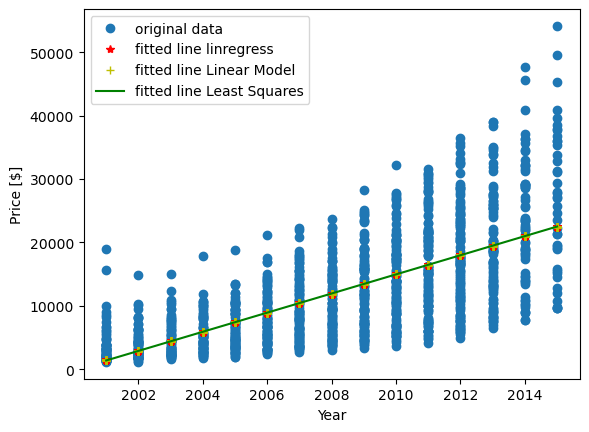

correlation coefficient wrt the year: 0.6767043169095447


In [9]:
# Plot the data, the 3 methods almost perfectly overlap
plt.plot(data[:,1], data[:,3], 'o', label='original data')
plt.plot(data[:,1], intercept + slope*data[:,1], 'r*', label='fitted line linregress')
plt.plot(data[:,1], float(reg.intercept_) + float(reg.coef_)*data[:,1], 'y+', label='fitted line Linear Model')
plt.plot(data[:,1], w[0] + w[1]*data[:,1], 'g', label='fitted line Least Squares')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price [$]')
plt.show()

print('correlation coefficient wrt the year:', r_value) 

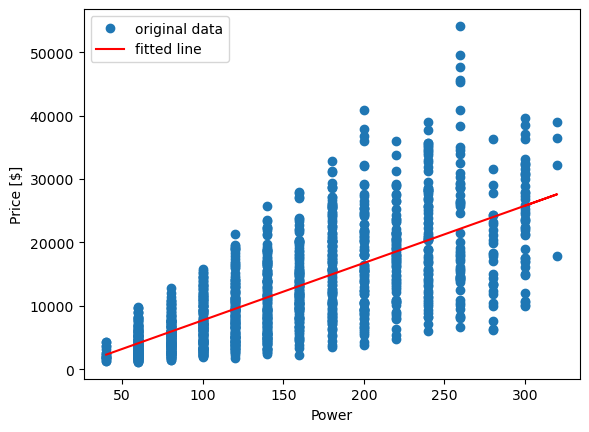

correlation coefficient wrt the power: 0.708550031526397


In [10]:
# Linear regression with linregress (estimate price from power)

slope, intercept, r_value, p_value, std_err = stats.linregress(data[:,2], data[:,3])
plt.plot(data[:,2], data[:,3], 'o', label='original data')
plt.plot(data[:,2], intercept + slope*data[:,2], 'r', label='fitted line')
plt.legend()
plt.xlabel('Power')
plt.ylabel('Price [$]')
plt.show()

print('correlation coefficient wrt the power:', r_value) #the power is the best feature!

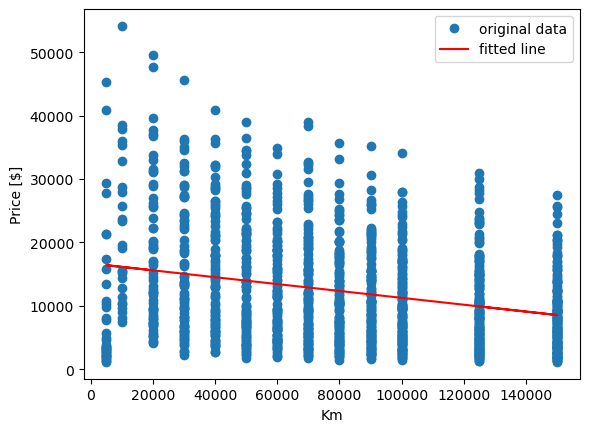

correlation coefficient wrt the km: -0.2572867429988496


In [12]:
# Linear regression with linregress (estimate price from km)

slope, intercept, r_value, p_value, std_err = stats.linregress(data[:,0], data[:,3])
plt.plot(data[:,0], data[:,3], 'o', label='original data')
plt.plot(data[:,0], intercept + slope*data[:,0], 'r', label='fitted line')
plt.legend()
plt.xlabel('Km')
plt.ylabel('Price [$]')
plt.show()

print('correlation coefficient wrt the km:', r_value) #km are not so good for the estimation

slope coefficients: [[1325.2284004    80.43004469]]
intercept: [-2661196.78674901]


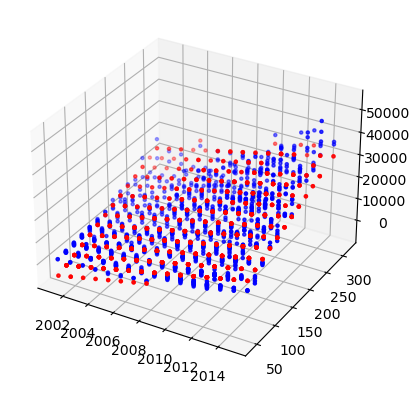

correlation coefficient: 0.9214943735217701
Much better correlation than the two features alone!


In [13]:
# 2D linear regression with linear model (estimate price from year and power)

reg = sl.linear_model.LinearRegression().fit(data[:,1:3].reshape(-1,2), data[:,3].reshape(-1,1))
print ('slope coefficients:',reg.coef_)
print ('intercept:', reg.intercept_)

# 3D plot (blue real data, red estimated ones)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,1], data[:,2], data[:,3], zdir='z', s=5, c='b', depthshade=True)
ax.scatter(data[:,1], data[:,2], reg.intercept_+reg.coef_[:,0]*data[:,1]+reg.coef_[:,1]*data[:,2], zdir='z', s=5, c='r', depthshade=True)
plt.show()

print('correlation coefficient:', np.sqrt(reg.score(data[:,1:3].reshape(-1,2), data[:,3].reshape(-1,1))))
print('Much better correlation than the two features alone!')